<a href="https://colab.research.google.com/github/agus2207/ESCOM/blob/master/Analisis_de_imagenes/IA_P1_2016630128.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT1w0hKLRBfUWki17i13oJcYhpwHa2tEon1oZagn7lYdogzehai&usqp=CAU" width="100" height="100" align="left" alt="IPN"/>
<img src="https://img1.freepng.es/20180531/hyf/kisspng-escom-instituto-politcnico-nacional-escuela-supe-lemon-grass-5b0fbe5636a625.6618946915277584222239.jpg" width="100" height="100" align="right" alt="Escom"/>
<h1><center><b>Análisis de Imagenes</b></center></h1>
<h1><center><b>Practica 1: Histogram and basic transforms</b></center></h1>

---

- **`Nombre:`** Galindo Reyes Agustin
- **`Grupo`**: 3CV6.
- **`Materia`**: Análisis de Imágenes.
- **`Profesor`**: Flavio Arturo Sanchez Garfias.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Image_analisis/Practica1/Images

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Image_analisis/Practica1/Images


**Para esta practica se tomaron fotos a 5 objetos claros en un fondo negro y 5 objetos oscuros con fondo claro en distintos ambientes (con luz natural, luz de lampara y sin luz), los cuales se analisaron y compararon para apreciar los diferentes histogramas que genera cada tipo de entorno y asi probar que el entorno influye cuando analizamos una imagen.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

Text(0.5, 0.98, 'Different illuminations of the object 1')

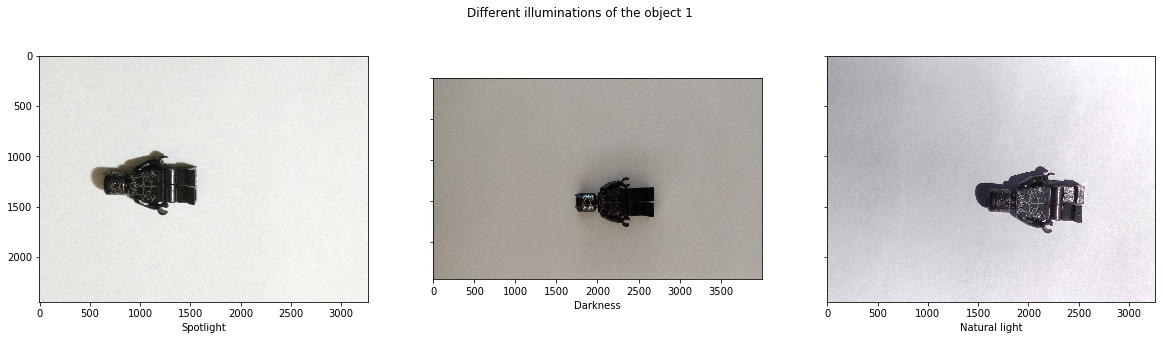

In [ ]:
filepath="./" #The current directory
filename1="Luz_claro.jpg"
filename2="Sin_luz_claro.jpg"
filename3="Sol_claro.jpg"

pic1=Image.open(filepath+filename1) #Open the image
pic2=Image.open(filepath+filename2) #Open the image
pic3=Image.open(filepath+filename3) #Open the image

fig, axs = plt.subplots(1, 3, figsize=(20,5), sharey=True)
axs[0].imshow(pic1, cmap='gray')
axs[0].set_xlabel("Spotlight")
axs[1].imshow(pic2, cmap='gray')
axs[1].set_xlabel("Darkness")
axs[2].imshow(pic3, cmap='gray')
axs[2].set_xlabel("Natural light")
fig.suptitle('Different illuminations of the object 1')

#pic #Diplays the image in the notebook

**Para desplegar la imagen se creo una funcion que recibe un arreglo esta funcion verifica que la imagen tenga mas de un canal. Si detecta que solo tiene un canal desplegara la imagen. Si detecta que tiene 3 canales entonces separara la imagen por colores (rojo, verde y azul) y los desplegara al mismo tiempo**

In [ ]:
def desplegar_imagen(pic_arr):
    dim = pic_arr.ndim
    if dim == 2:
        plt.imshow(pic_gray,cmap='gray')
    elif dim >= 3:
        fig, axs = plt.subplots(1, 3, figsize=(20,5), sharey=True)
        axs[0].imshow(pic_red)
        axs[0].set_xlabel("Red channel")
        axs[1].imshow(pic_green)
        axs[1].set_xlabel("Green channel")
        axs[2].imshow(pic_blue)
        axs[2].set_xlabel("Blue channel")
        fig.suptitle('RGB of the object') 

**Para tener el histograma de la imagen se creo una funcion que recibe un arreglo. Esta funcion verifica con cuantos canales cuenta la imagen, si solo cuenta con un canal, desplegara el histograma de la imagen, si detecta 3 canales entonces desplegara el histograma de cada color de los canales RGB de la imagen. Para desplegar el histograma se hace un conteo pixel por pixel para ver en que rango estan y almacenarlos en un array que guardara los valores a graficar.**

In [ ]:
def histograma(pic_arr):
    height=pic_arr.shape[0]
    width=pic_arr.shape[1]
    dim = pic_arr.ndim
    if dim == 2:
        hist_gray=np.zeros(256)
        for i in range(0,height):
            for j in range(0, width):
                hist_gray[pic_gray[i,j]]+=1

        plt.plot(hist_gray,color = "black")
    elif dim >= 3:
        #RED CHANNEL
        hist_red=np.zeros(256)
        for i in range(0,height):   #FOR EVERY ROW   
            for j in range(0,width):   #FOR EVERY COLUMN
                hist_red[pic_red[i,j,0]]+=1
        #GREEN CHANNEL
        hist_green=np.zeros(256)
        for i in range(0,height):   #FOR EVERY ROW   
            for j in range(0,width):   #FOR EVERY COLUMN
                hist_green[pic_green[i,j,1]]+=1
        #BLUE CHANNEL
        hist_blue=np.zeros(256)
        for i in range(0,height):   #FOR EVERY ROW   
            for j in range(0,width):   #FOR EVERY COLUMN
                hist_blue[pic_blue[i,j,2]]+=1
        fig, axs = plt.subplots(1, 3, figsize=(20,5), sharey=True)
        axs[0].plot(hist_red,color = "r")
        axs[0].set_xlabel("red")
        axs[1].plot(hist_green,color = "g")
        axs[1].set_xlabel("green")
        axs[2].plot(hist_blue,color = "b")
        axs[2].set_xlabel("blue")
        fig.suptitle('Histogram channels')

**Para transformar una imagen en escala de grises se creo una funcion la cual recibe el arreglo de la imagen en y esta la multiplica por los valores [0.24,0.65,011] los cuales son valores por default para transformar la imagen en escala de grises basado en HSI.**

In [ ]:
def rgbtogray(pic_arr):
    dim = pic_arr.ndim
    if dim == 2:
        return pic_arr
    else:
        return np.dot(pic_arr[...,:3], [0.24,0.65,0.11])

**Para transformar una imagen en escala de grises a binaria lo unico que se hizo fue definir un valor para Threshold el cual en este caso sera 120, depues se recorre la imagen pixel por pixel y buscamos los valores que sean menor a nuestra variable de Threshold para convertirlos en 0, los demas valores seran 255.**

In [ ]:
def Threshold(pic_res):
    T=120 #The Threshold
    height=pic_res.shape[0]
    width=pic_res.shape[1]
    pic_arr2=pic_res.copy()

    for channel in range(0,3):   #FOR EVERY CHANNEL (R,G,B)
        for i in range(0,height):   #FOR EVERY ROW   
            for j in range(0,width):   #FOR EVERY COLUMN
                if pic_arr2[i,j]<T: #IF THE PIXELS VALUE IS LESS THAN THE THRESHOLD T
                    pic_arr2[i,j]=0   #SET TO 0
                else:
                    pic_arr2[i,j]=255 #SET TO 255

    plt.imshow(pic_arr2, cmap='gray')

# **Object 1 (Spotlight)**

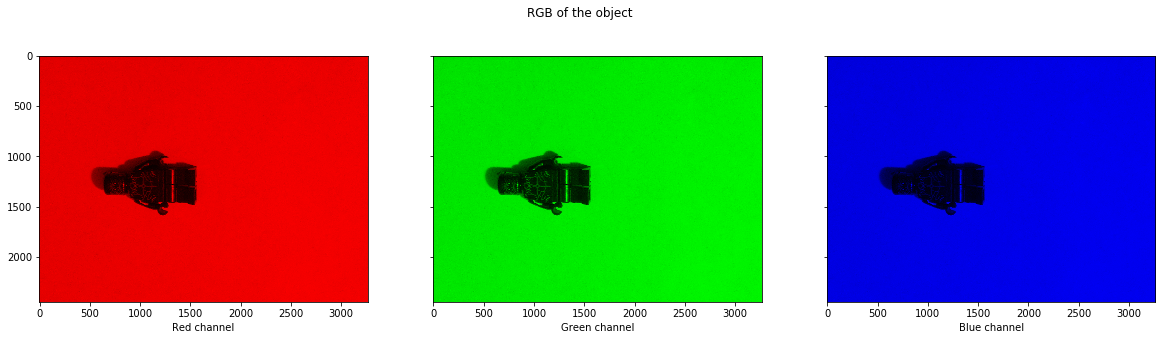

In [ ]:
pic_arr = np.asarray(pic1)
dim = pic_arr.ndim
if dim == 2:
    pic_gray=pic_arr.copy()
    pic_gray=pic_gray[:,:]
elif dim >= 3:
    #red channel
    pic_red = pic_arr.copy() 
    pic_red[:,:,1]=0
    pic_red[:,:,2]=0
    #green channel
    pic_green = pic_arr.copy()
    pic_green[:,:,0]=0
    pic_green[:,:,2]=0
    #blue channel
    pic_blue = pic_arr.copy()
    pic_blue[:,:,0]=0
    pic_blue[:,:,1]=0
    
desplegar_imagen(pic_arr)


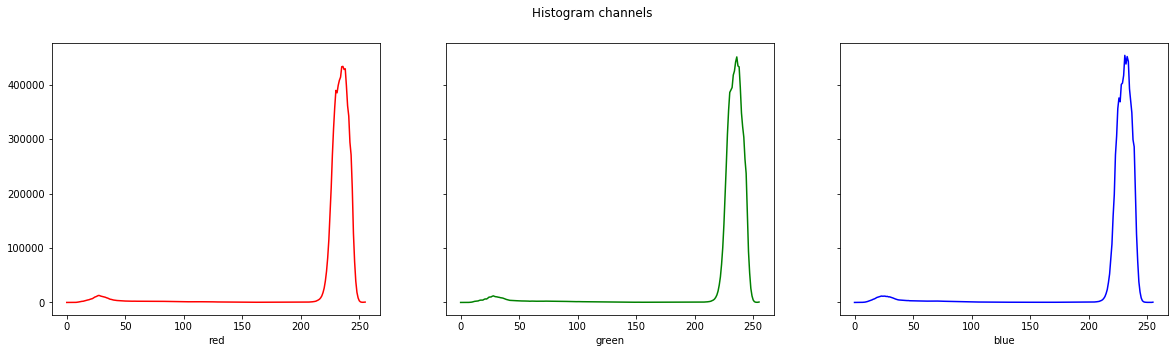

In [ ]:
histograma(pic_arr)

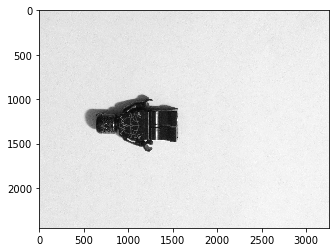

In [ ]:
pic_res = rgbtogray(pic_arr)
plt.imshow(pic_res,cmap='gray')

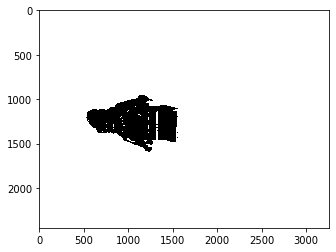

In [ ]:
Threshold(pic_res)

# **Object 2 (Darkness)**

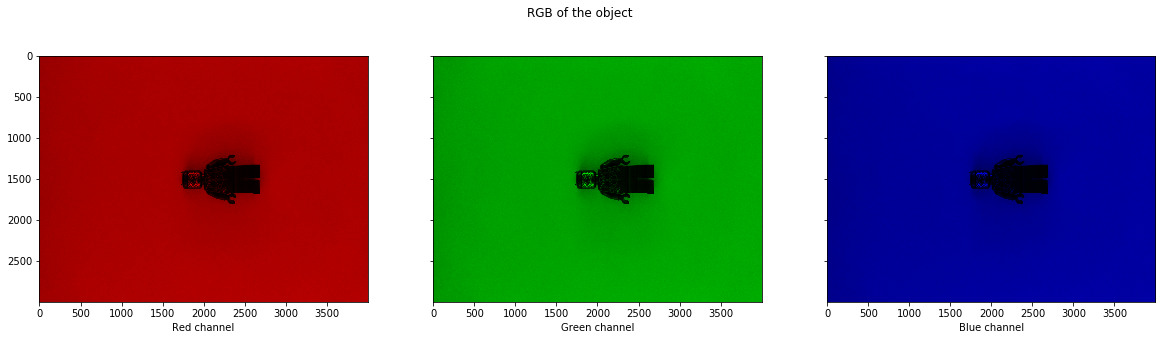

In [ ]:
pic_arr = np.asarray(pic2)
dim = pic_arr.ndim
if dim == 2:
    pic_gray=pic_arr.copy()
    pic_gray=pic_gray[:,:]
elif dim >= 3:
    #red channel
    pic_red = pic_arr.copy() 
    pic_red[:,:,1]=0
    pic_red[:,:,2]=0
    #green channel
    pic_green = pic_arr.copy()
    pic_green[:,:,0]=0
    pic_green[:,:,2]=0
    #blue channel
    pic_blue = pic_arr.copy()
    pic_blue[:,:,0]=0
    pic_blue[:,:,1]=0
desplegar_imagen(pic_arr)

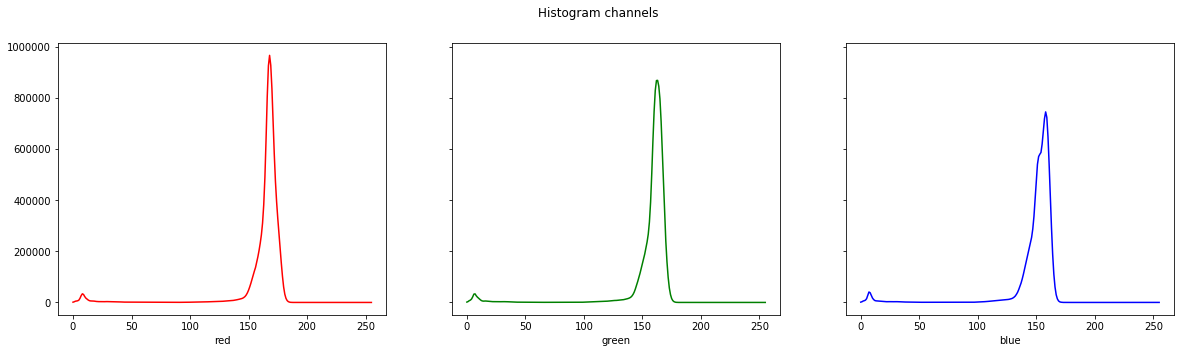

In [ ]:
histograma(pic_arr)

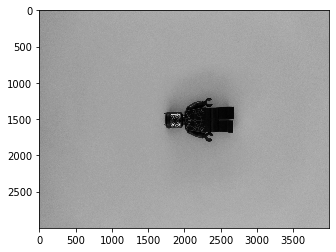

In [ ]:
pic_res = rgbtogray(pic_arr)
plt.imshow(pic_res,cmap='gray')

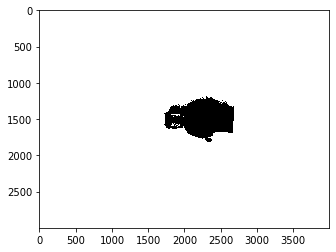

In [ ]:
Threshold(pic_res)

# **Object 3 (Natural light)**

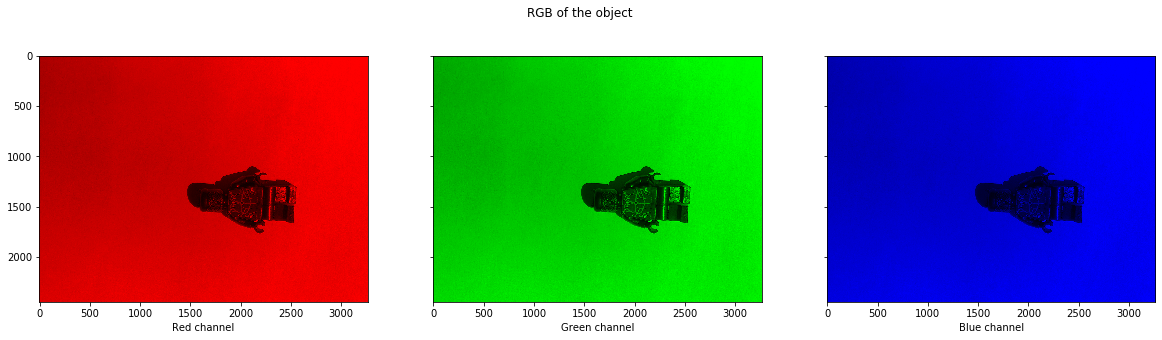

In [ ]:
pic_arr = np.asarray(pic3)
dim = pic_arr.ndim
if dim == 2:
    pic_gray=pic_arr.copy()
    pic_gray=pic_gray[:,:]
elif dim >= 3:
    #red channel
    pic_red = pic_arr.copy() 
    pic_red[:,:,1]=0
    pic_red[:,:,2]=0
    #green channel
    pic_green = pic_arr.copy()
    pic_green[:,:,0]=0
    pic_green[:,:,2]=0
    #blue channel
    pic_blue = pic_arr.copy()
    pic_blue[:,:,0]=0
    pic_blue[:,:,1]=0
desplegar_imagen(pic_arr)

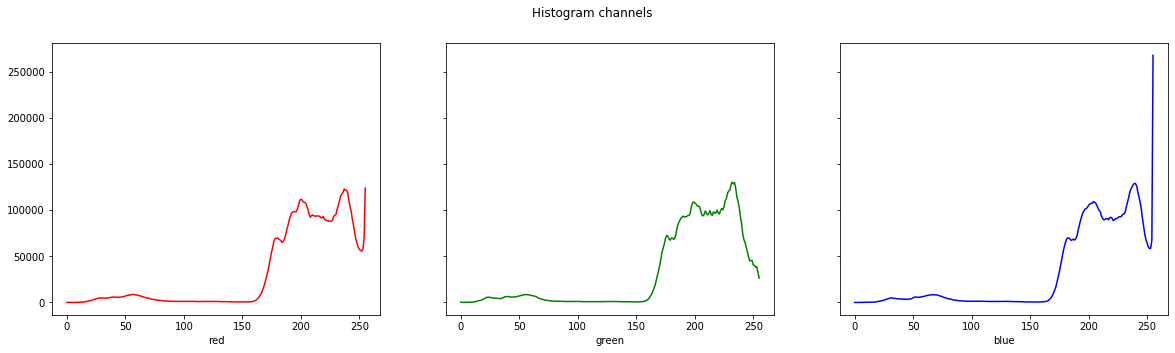

In [ ]:
histograma(pic_arr)

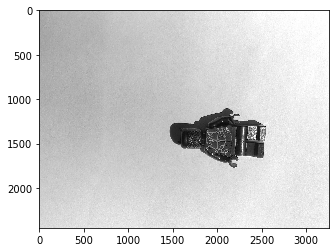

In [ ]:
pic_res = rgbtogray(pic_arr)
plt.imshow(pic_res,cmap='gray')

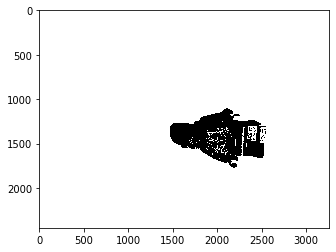

In [ ]:
Threshold(pic_res)

**Para concluir con la practica se puede observar que la iluminacion de un objeto y el fondo afecta el como se percibe la imagen, generando distintos valores cuando se hace su analisis en los 3 canales de colores (RGB).**
**También se aprendio a usar varios metodos de la libreria numpy la cual es de mucha ayuda para realizar operaciones con matrices, como tomar solo cierta parte de la matfriz o convertir una imagen en un array con sus respectivos valores.**
**Otra observacion interesante es que debemos de verificar con cuantos canales cuenta la imagen que vamos a analizar, ya que dependiendo de ello vamos a ver como debemos analizar dicha imagen.**